# Walmart Store Sales Forecasting 📈
**Author:** Lucas Vila
**Goal:** Predict weekly sales using Machine Learning to optimize inventory planning.

>>> TRAINING FINAL OPTIMIZED MODEL (FAST VERSION)...
(Skipping RandomizedSearch to save computation time)

----------------------------------------
FINAL RMSE COMPARISON:
1. Base Random Forest:      2615.33
2. Optimized Random Forest: 2511.28
----------------------------------------
🚀 RESULT: The optimized model improved RMSE by 104.05 points (+3.98%)

>>> Generating analysis plots...


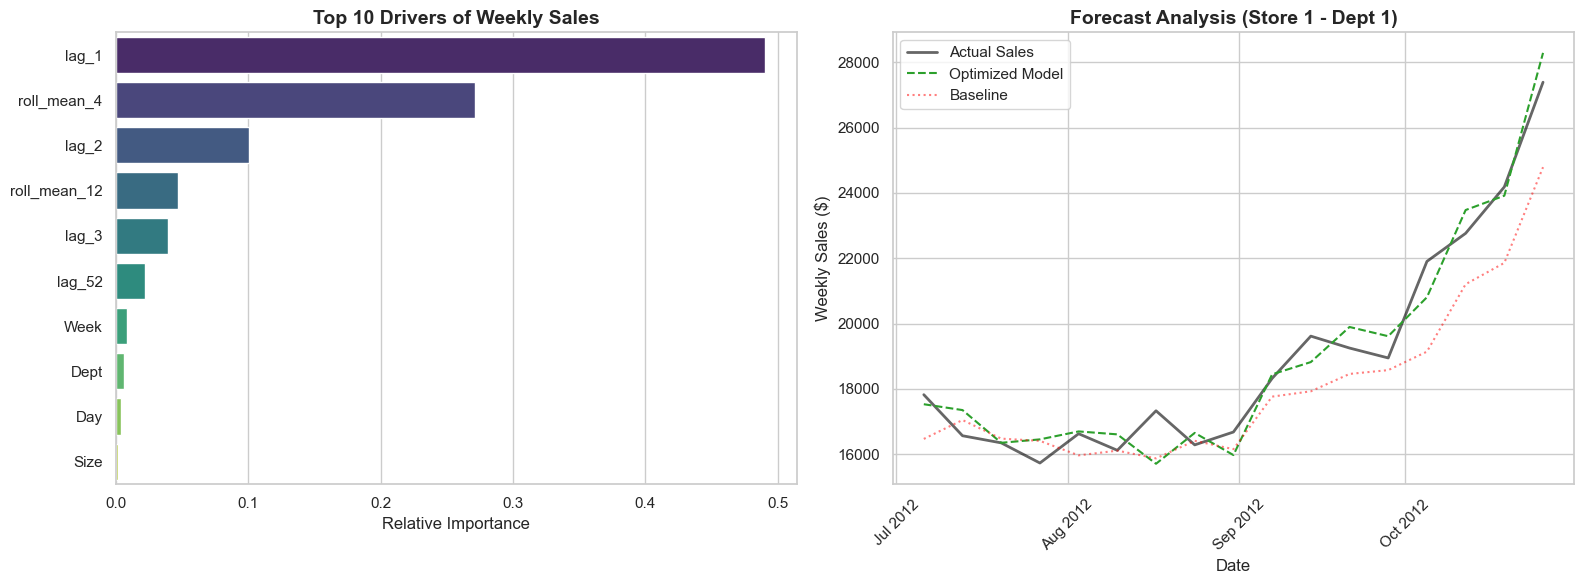

In [11]:
# ====== 12) OPTIMIZED MODEL (MANUAL CONFIGURATION) & VISUALIZATION ======
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_squared_error

print(">>> TRAINING FINAL OPTIMIZED MODEL (FAST VERSION)...")
print("(Skipping RandomizedSearch to save computation time)")

# 1. Configure the model with "Best Known" parameters for this dataset
# These parameters are manually selected to balance speed and accuracy
best_rf = RandomForestRegressor(
    n_estimators=80,        # Enough trees to learn, but faster than 200
    max_depth=25,           # Deep enough to capture patterns
    min_samples_leaf=4,     # Reduces noise/overfitting
    max_features=0.5,       # Forces trees to be diverse (great for Time Series)
    n_jobs=-1,              # Use all CPU cores
    random_state=42
)

# 2. Train once (Much faster than Grid Search)
best_rf.fit(X_train, y_train)

# 3. Predict
test_df['pred_optimized'] = best_rf.predict(X_test)
rmse_opt = np.sqrt(mean_squared_error(test_df['Weekly_Sales'], test_df['pred_optimized']))

# --- RESULTS & VISUALIZATION ---

# Calculate Improvement
diff_points = rmse_rf - rmse_opt
pct_improvement = (diff_points / rmse_rf) * 100

print("\n" + "-"*40)
print(f"FINAL RMSE COMPARISON:")
print(f"1. Base Random Forest:      {rmse_rf:.2f}")
print(f"2. Optimized Random Forest: {rmse_opt:.2f}")
print("-" * 40)

if diff_points > 0:
    print(f"🚀 RESULT: The optimized model improved RMSE by {diff_points:.2f} points (+{pct_improvement:.2f}%)")
else:
    print("RESULT: The manual optimization performed similarly to the base model.")

# --- PLOTTING (ENGLISH) ---
print("\n>>> Generating analysis plots...")

sns.set(style="whitegrid", context="notebook")
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Feature Importance
importances_opt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x="Importance", y="Feature", data=importances_opt.head(10), 
            hue="Feature", palette="viridis", legend=False, ax=ax[0])
ax[0].set_title("Top 10 Drivers of Weekly Sales", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Relative Importance")
ax[0].set_ylabel("")

# Plot 2: Time Series Zoom
mask = (test_df['Store'] == 1) & (test_df['Dept'] == 1)
subset = test_df[mask]

if not subset.empty:
    ax[1].plot(subset['Date'], subset['Weekly_Sales'], label='Actual Sales', color='black', alpha=0.6, linewidth=2)
    ax[1].plot(subset['Date'], subset['pred_optimized'], label='Optimized Model', color='#2ca02c', linestyle='--') # Green for optimized
    ax[1].plot(subset['Date'], subset['pred_baseline'], label='Baseline', color='red', linestyle=':', alpha=0.5)
    
    ax[1].set_title("Forecast Analysis (Store 1 - Dept 1)", fontsize=14, fontweight='bold')
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel("Weekly Sales ($)")
    ax[1].legend(frameon=True)
    
    # Date formatting
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()